<a href="https://colab.research.google.com/github/shishirsaikat589/BoiGhor/blob/main/Thesis_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd
#!pip install xgboost
#!pip install catboost
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("IoT_Intrusion.csv")
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1,0,1,...,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0,0,0,...,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0,0,0,...,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0,0,0,...,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0,1,0,...,23.113111,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1.391925,108.00,6.00,64.00,1.437685,1.437685,0.0,0,1,0,...,0.000000,54.00,8.336550e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
1048571,0.000000,2.14,46.70,65.91,0.000000,0.000000,0.0,0,0,0,...,5.281048,588.22,8.367732e+07,9.5,34.370618,7.497140,469.190222,0.06,141.55,Mirai-greeth_flood
1048572,0.132971,30847.00,17.00,64.00,5978.034950,5978.034950,0.0,0,0,0,...,0.000000,50.00,8.312373e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
1048573,0.000000,54.00,6.00,64.00,25.672981,25.672981,0.0,1,0,1,...,0.000000,54.00,8.334509e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 47 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   flow_duration    1048575 non-null  float64
 1   Header_Length    1048575 non-null  float64
 2   Protocol Type    1048575 non-null  float64
 3   Duration         1048575 non-null  float64
 4   Rate             1048575 non-null  float64
 5   Srate            1048575 non-null  float64
 6   Drate            1048575 non-null  float64
 7   fin_flag_number  1048575 non-null  int64  
 8   syn_flag_number  1048575 non-null  int64  
 9   rst_flag_number  1048575 non-null  int64  
 10  psh_flag_number  1048575 non-null  int64  
 11  ack_flag_number  1048575 non-null  int64  
 12  ece_flag_number  1048575 non-null  int64  
 13  cwr_flag_number  1048575 non-null  int64  
 14  ack_count        1048575 non-null  float64
 15  syn_count        1048575 non-null  float64
 16  fin_count        1

In [ ]:
df.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.763553e+00,7.759537e+04,9.062979e+00,6.635523e+01,9.146945e+03,9.146945e+03,1.807621e-06,8.655842e-02,2.073090e-01,9.057149e-02,...,1.248502e+02,3.345817e+01,1.248978e+02,8.317382e+07,9.497998e+00,1.312711e+01,4.728151e+01,3.147998e+04,9.635824e-02,1.414999e+02
std,2.965660e+02,4.664043e+05,8.936737e+00,1.408680e+01,9.974794e+04,9.974794e+04,8.501385e-04,2.811870e-01,4.053790e-01,2.869989e-01,...,2.420296e+02,1.622552e+02,2.429223e+02,1.703857e+07,8.187710e-01,8.639921e+00,2.294819e+02,3.645895e+05,2.327718e-01,2.105725e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.200000e+01,0.000000e+00,4.200000e+01,0.000000e+00,1.000000e+00,9.165151e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,2.087155e+00,2.087155e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.000000e+01,0.000000e+00,5.000000e+01,8.307157e+07,9.500000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
50%,0.000000e+00,5.400000e+01,6.000000e+00,6.400000e+01,1.581371e+01,1.581371e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.400000e+01,0.000000e+00,5.400000e+01,8.312452e+07,9.500000e+00,1.039230e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02
75%,1.042881e-01,2.781200e+02,1.428000e+01,6.400000e+01,1.174380e+02,1.174380e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.405208e+01,3.777740e-01,5.406000e+01,8.334390e+07,9.500000e+00,1.039675e+01,5.059213e-01,1.370916e+00,8.000000e-02,1.415500e+02
max,9.943576e+04,9.815555e+06,4.700000e+01,2.550000e+02,7.340032e+06,7.340032e+06,8.484654e-01,1.000000e+00,1.000000e+00,1.000000e+00,...,8.040961e+03,1.099626e+04,1.309800e+04,1.676394e+08,1.500000e+01,1.252094e+02,1.555106e+04,1.372844e+08,1.000000e+00,2.446000e+02


In [ ]:
df.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

In [ ]:
df.duplicated().sum()

65556

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(983019, 47)

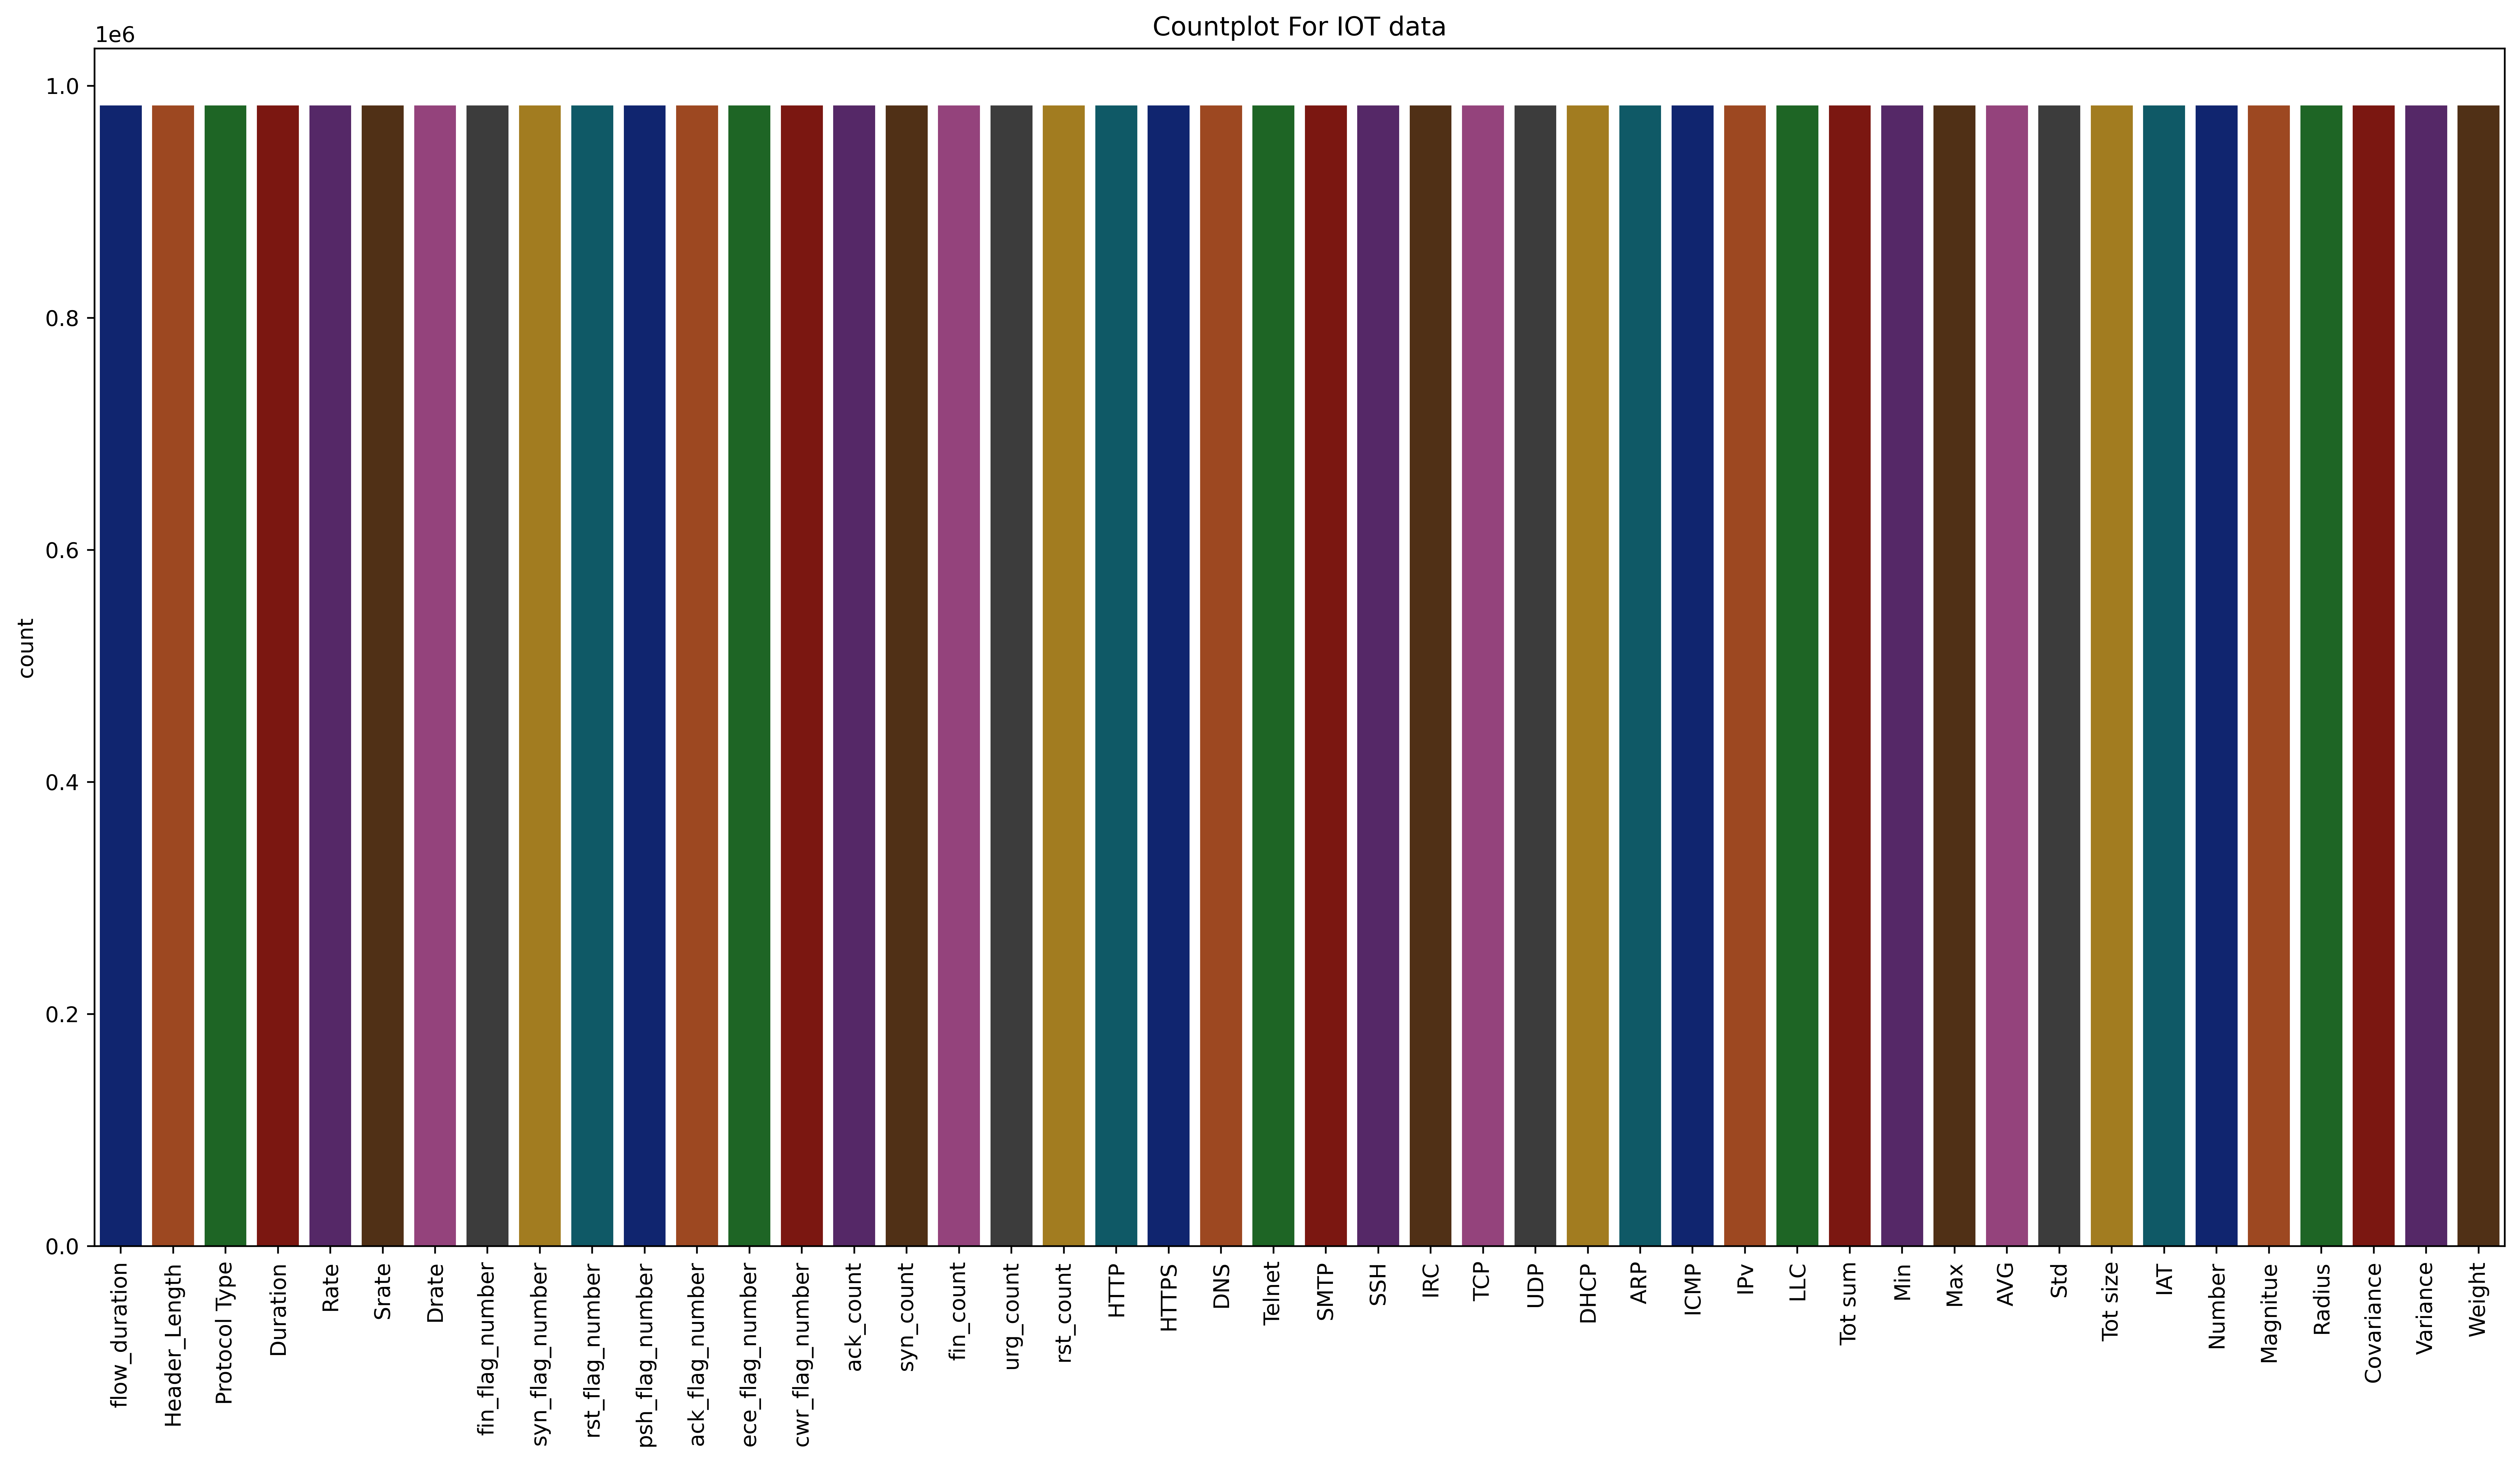

In [ ]:
plt.figure(figsize=(20,10),dpi=500)
plt.xticks(rotation=90)
plt.title("Countplot For IOT data")
sns.countplot(df,palette='dark');

<Axes: xlabel='Rate', ylabel='Duration'>

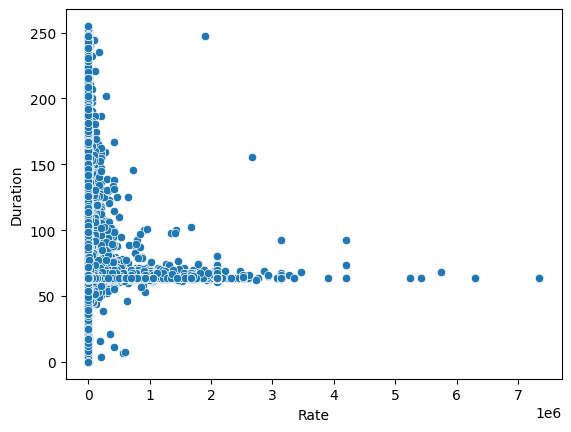

In [ ]:
sns.scatterplot(df,x='Rate',y='Duration')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop("label",axis=1)
y = df['label']

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['label']= label_encoder.fit_transform(df['label'])

df['label'].unique()

array([ 9, 20,  6, 21, 19, 23, 12, 25, 10,  8, 13, 14,  1, 22,  4, 24, 18,
        7, 29, 16, 15, 27, 33,  5, 26,  3, 32, 11,  0,  2, 17, 30, 28, 31])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_test,pred)

0.9923331502241393

In [ ]:
class_report = classification_report(y_test,pred)

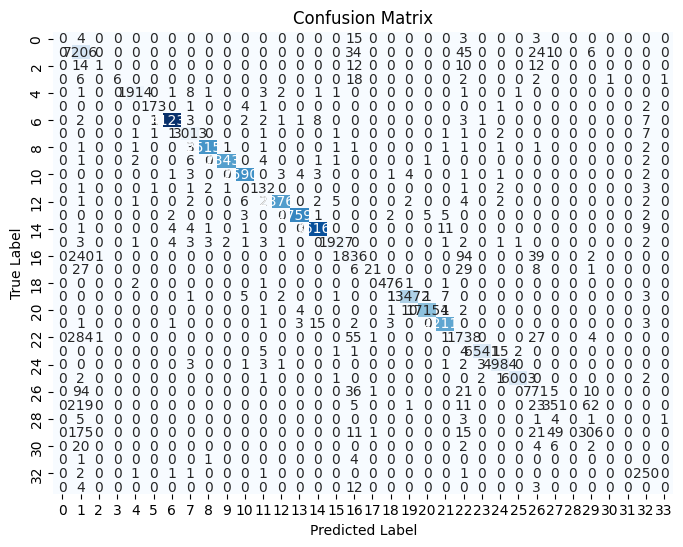

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, pred)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

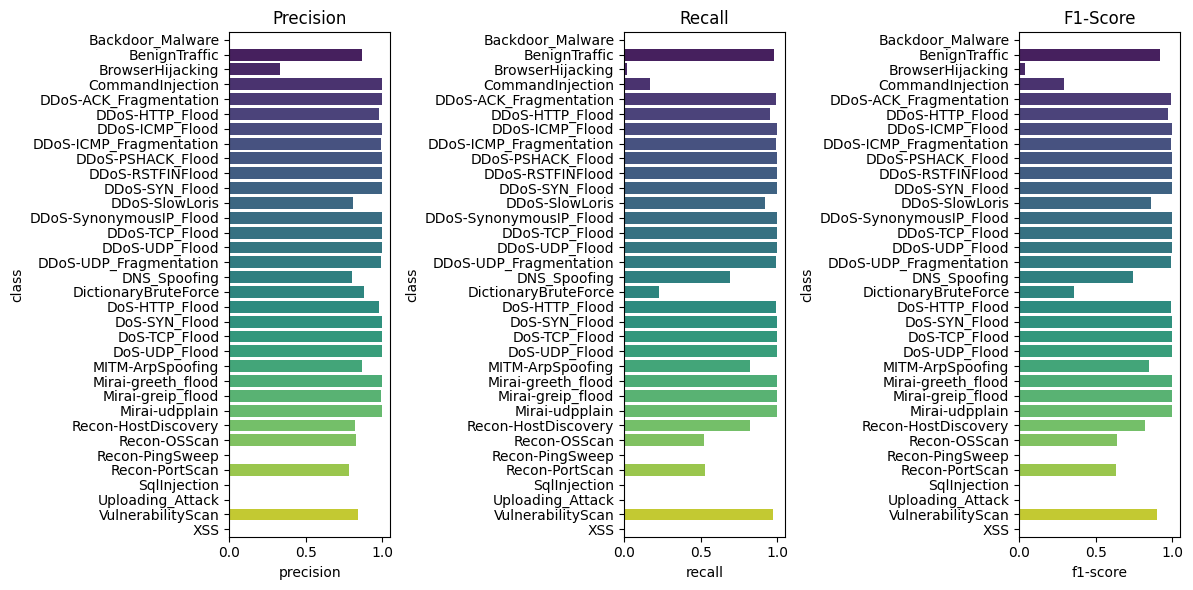

In [ ]:
# Visualize classification report
# Extract values from the report for plotting
report_data = []
for row in class_report.split('\n')[2:-5]:
    row_data = row.split()
    report_data.append({
        'class': row_data[0],
        'precision': float(row_data[1]),
        'recall': float(row_data[2]),
        'f1-score': float(row_data[3])
    })

# Create a DataFrame from the extracted data
df_report = pd.DataFrame(report_data)

# Visualize precision, recall, and f1-score using bar plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='precision', y='class', data=df_report, palette='viridis')
plt.title('Precision')

plt.subplot(1, 3, 2)
sns.barplot(x='recall', y='class', data=df_report, palette='viridis')
plt.title('Recall')

plt.subplot(1, 3, 3)
sns.barplot(x='f1-score', y='class', data=df_report, palette='viridis')
plt.title('F1-Score')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test,pred)

0.9922721138261005

In [ ]:
a = classification_report(y_test,pred)
print(classification_report(y_test,pred))

                         precision    recall  f1-score   support

       Backdoor_Malware       0.45      0.60      0.52        25
          BenignTraffic       0.92      0.91      0.92      7325
       BrowserHijacking       0.49      0.43      0.46        49
       CommandInjection       0.54      0.53      0.54        36
 DDoS-ACK_Fragmentation       1.00      1.00      1.00      1934
        DDoS-HTTP_Flood       0.98      0.99      0.99       182
        DDoS-ICMP_Flood       1.00      1.00      1.00     41266
DDoS-ICMP_Fragmentation       1.00      1.00      1.00      3029
      DDoS-PSHACK_Flood       1.00      1.00      1.00     25170
       DDoS-RSTFINFlood       1.00      1.00      1.00     23457
         DDoS-SYN_Flood       1.00      1.00      1.00     25928
         DDoS-SlowLoris       0.99      0.96      0.97       144
DDoS-SynonymousIP_Flood       1.00      1.00      1.00     23791
         DDoS-TCP_Flood       1.00      1.00      1.00     27619
         DDoS-UDP_Flood 

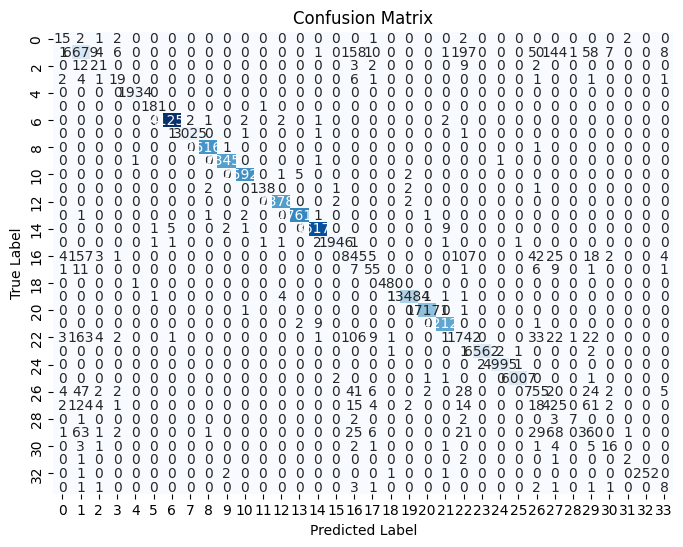

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, pred)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

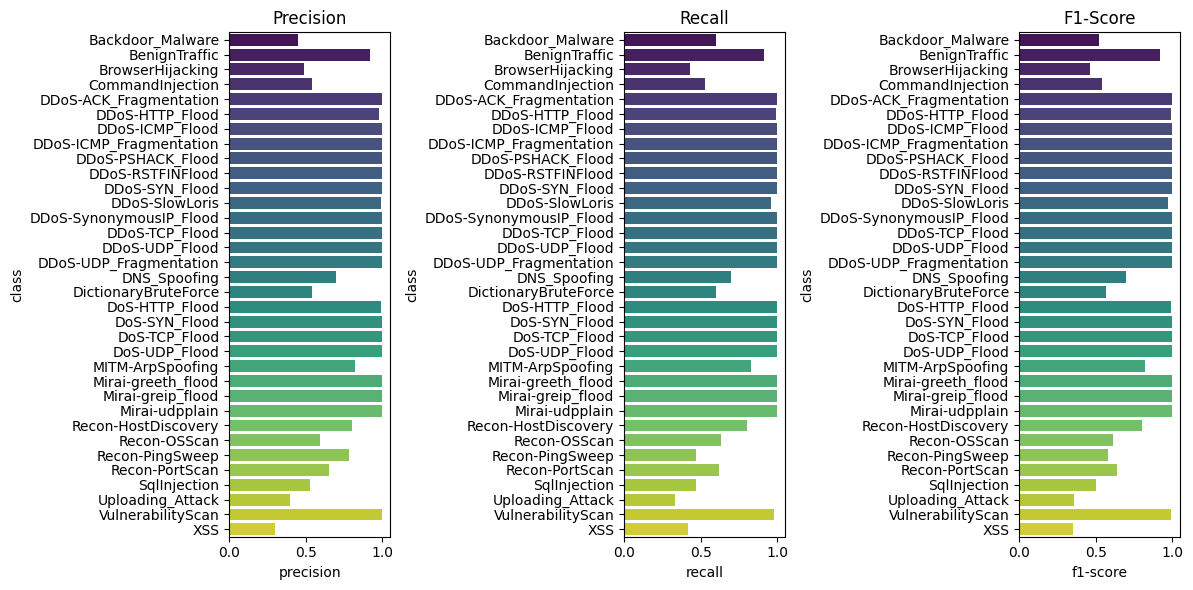

In [ ]:
# Visualize classification report
# Extract values from the report for plotting
report_data = []
for row in a.split('\n')[2:-5]:
    row_data = row.split()
    report_data.append({
        'class': row_data[0],
        'precision': float(row_data[1]),
        'recall': float(row_data[2]),
        'f1-score': float(row_data[3])
    })

# Create a DataFrame from the extracted data
df_report = pd.DataFrame(report_data)

# Visualize precision, recall, and f1-score using bar plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='precision', y='class', data=df_report, palette='viridis')
plt.title('Precision')

plt.subplot(1, 3, 2)
sns.barplot(x='recall', y='class', data=df_report, palette='viridis')
plt.title('Recall')

plt.subplot(1, 3, 3)
sns.barplot(x='f1-score', y='class', data=df_report, palette='viridis')
plt.title('F1-Score')

plt.tight_layout()
plt.show()

In [ ]:
X = df.drop("label",axis=1)
y = df['label']

df['label']= label_encoder.fit_transform(df['label'])
df['label'].unique()

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test,pred)


0.9917634771757781

In [ ]:
b = classification_report(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.33      0.04      0.07        25
           1       0.89      0.96      0.92      7325
           2       0.12      0.02      0.04        49
           3       0.88      0.19      0.32        36
           4       1.00      1.00      1.00      1934
           5       0.97      0.97      0.97       182
           6       1.00      1.00      1.00     41266
           7       1.00      1.00      1.00      3029
           8       1.00      1.00      1.00     25170
           9       1.00      1.00      1.00     23457
          10       1.00      1.00      1.00     25928
          11       0.94      0.92      0.93       144
          12       1.00      1.00      1.00     23791
          13       1.00      1.00      1.00     27619
          14       1.00      1.00      1.00     36195
          15       1.00      1.00      1.00      1955
          16       0.69      0.65      0.67      1213
          17       0.64    

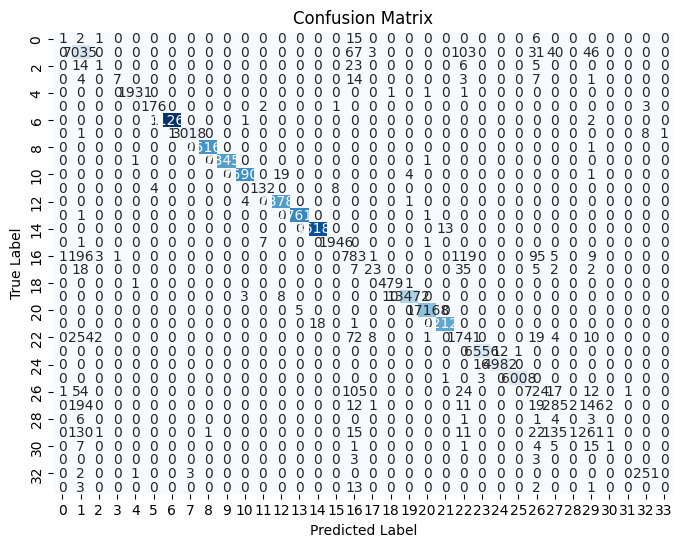

In [ ]:
conf_matrix = confusion_matrix(y_test, pred)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

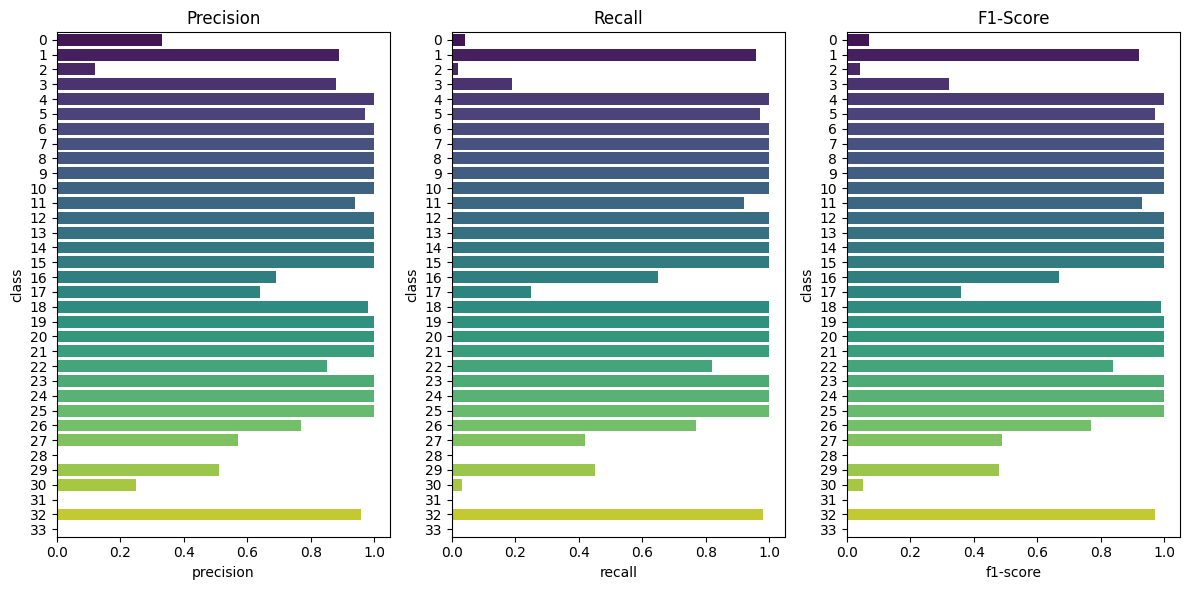

In [ ]:
# Visualize classification report
# Extract values from the report for plotting
report_data = []
for row in b.split('\n')[2:-5]:
    row_data = row.split()
    report_data.append({
        'class': row_data[0],
        'precision': float(row_data[1]),
        'recall': float(row_data[2]),
        'f1-score': float(row_data[3])
    })

# Create a DataFrame from the extracted data
df_report = pd.DataFrame(report_data)

# Visualize precision, recall, and f1-score using bar plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='precision', y='class', data=df_report, palette='viridis')
plt.title('Precision')

plt.subplot(1, 3, 2)
sns.barplot(x='recall', y='class', data=df_report, palette='viridis')
plt.title('Recall')

plt.subplot(1, 3, 3)
sns.barplot(x='f1-score', y='class', data=df_report, palette='viridis')
plt.title('F1-Score')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [ ]:
pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test,pred)

0.7111181189938489

In [ ]:
d = classification_report(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.75      1.00      0.86      7325
           2       0.00      0.00      0.00        49
           3       0.00      0.00      0.00        36
           4       0.84      0.89      0.87      1934
           5       0.00      0.00      0.00       182
           6       1.00      1.00      1.00     41266
           7       0.98      0.96      0.97      3029
           8       0.97      0.05      0.10     25170
           9       1.00      1.00      1.00     23457
          10       0.39      1.00      0.56     25928
          11       0.00      0.00      0.00       144
          12       0.96      0.29      0.45     23791
          13       0.76      0.89      0.82     27619
          14       0.72      0.93      0.81     36195
          15       0.00      0.00      0.00      1955
          16       0.81      0.57      0.67      1213
          17       0.00    

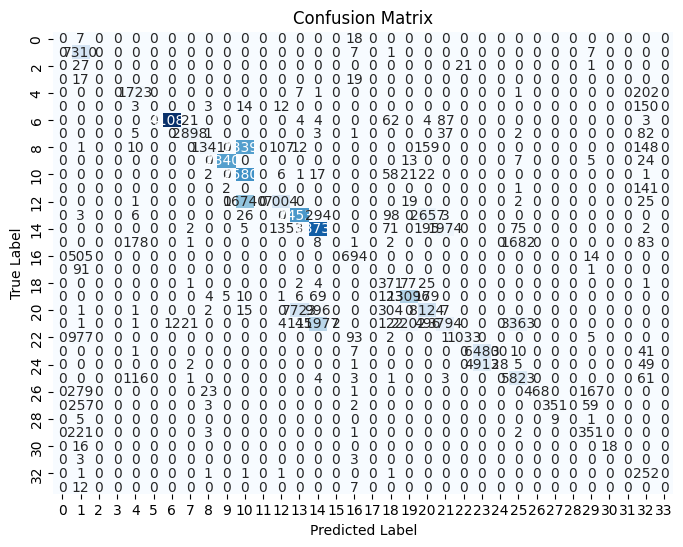

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, pred)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

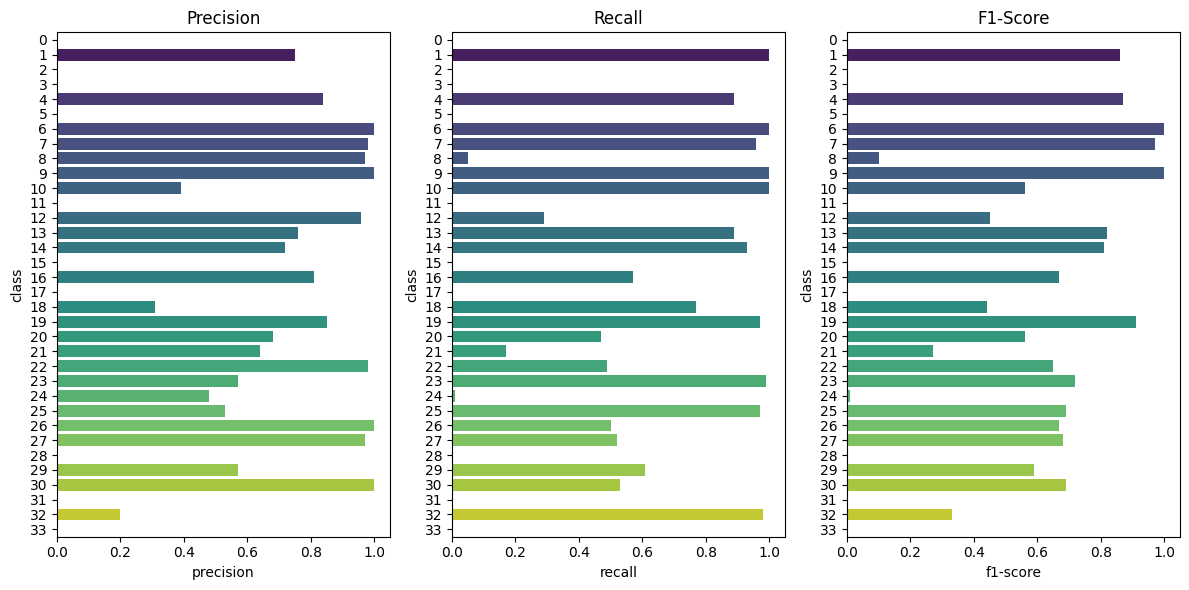

In [ ]:
# Visualize classification report
# Extract values from the report for plotting
report_data = []
for row in d.split('\n')[2:-5]:
    row_data = row.split()
    report_data.append({
        'class': row_data[0],
        'precision': float(row_data[1]),
        'recall': float(row_data[2]),
        'f1-score': float(row_data[3])
    })

# Create a DataFrame from the extracted data
df_report = pd.DataFrame(report_data)

# Visualize precision, recall, and f1-score using bar plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='precision', y='class', data=df_report, palette='viridis')
plt.title('Precision')

plt.subplot(1, 3, 2)
sns.barplot(x='recall', y='class', data=df_report, palette='viridis')
plt.title('Recall')

plt.subplot(1, 3, 3)
sns.barplot(x='f1-score', y='class', data=df_report, palette='viridis')
plt.title('F1-Score')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=12)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [ ]:
pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test,pred)

0.9404657755352553

In [ ]:
e = classification_report(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.73      0.97      0.83      7325
           2       0.00      0.00      0.00        49
           3       0.00      0.00      0.00        36
           4       0.98      0.98      0.98      1934
           5       0.67      0.70      0.69       182
           6       1.00      1.00      1.00     41266
           7       0.97      0.98      0.97      3029
           8       1.00      1.00      1.00     25170
           9       1.00      1.00      1.00     23457
          10       0.90      0.96      0.93     25928
          11       0.57      0.62      0.60       144
          12       0.98      0.95      0.96     23791
          13       0.92      0.98      0.95     27619
          14       0.91      0.95      0.93     36195
          15       0.98      0.98      0.98      1955
          16       0.51      0.33      0.40      1213
          17       1.00    

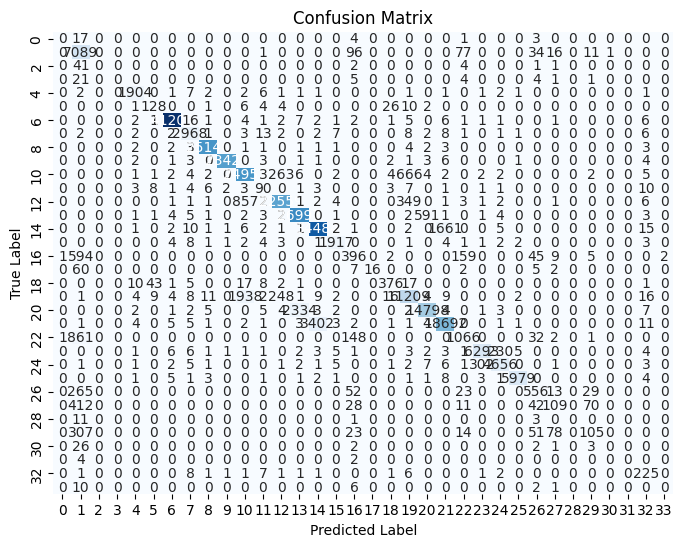

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, pred)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

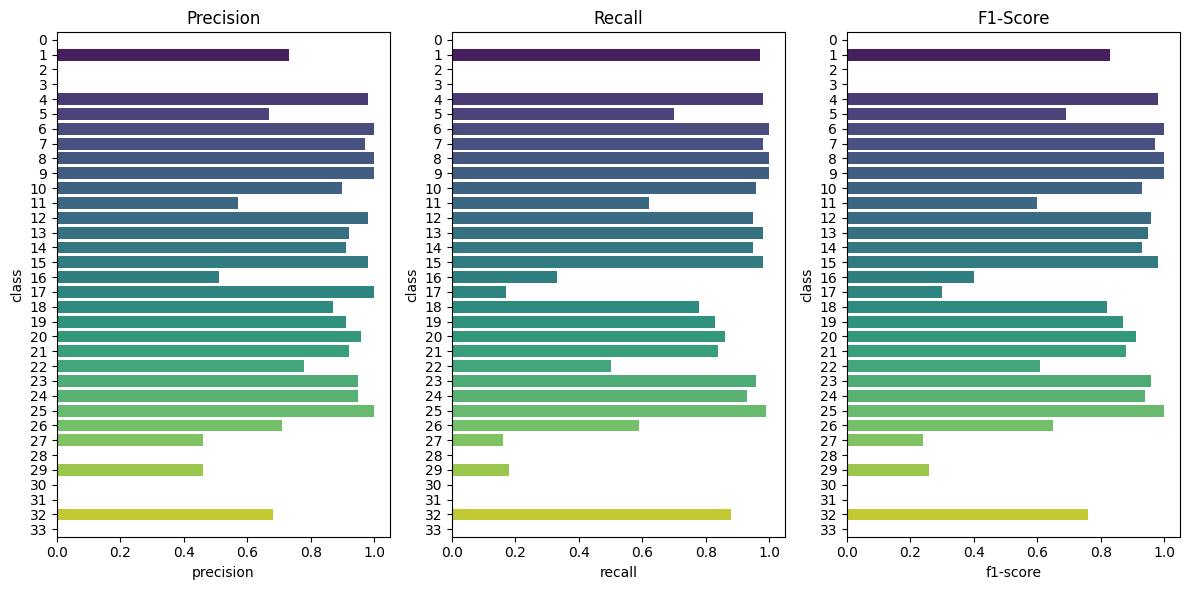

In [ ]:
# Visualize classification report
# Extract values from the report for plotting
report_data = []
for row in e.split('\n')[2:-5]:
    row_data = row.split()
    report_data.append({
        'class': row_data[0],
        'precision': float(row_data[1]),
        'recall': float(row_data[2]),
        'f1-score': float(row_data[3])
    })

# Create a DataFrame from the extracted data
df_report = pd.DataFrame(report_data)

# Visualize precision, recall, and f1-score using bar plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='precision', y='class', data=df_report, palette='viridis')
plt.title('Precision')

plt.subplot(1, 3, 2)
sns.barplot(x='recall', y='class', data=df_report, palette='viridis')
plt.title('Recall')

plt.subplot(1, 3, 3)
sns.barplot(x='f1-score', y='class', data=df_report, palette='viridis')
plt.title('F1-Score')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test,pred)

0.7937987019592684

In [ ]:
f = classification_report(y_test,pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.70      0.94      0.80      7325
           2       0.00      0.00      0.00        49
           3       1.00      0.17      0.29        36
           4       0.97      0.98      0.98      1934
           5       0.58      0.60      0.59       182
           6       1.00      1.00      1.00     41266
           7       0.99      0.97      0.98      3029
           8       1.00      1.00      1.00     25170
           9       1.00      1.00      1.00     23457
          10       0.65      0.96      0.78     25928
          11       0.40      0.15      0.22       144
          12       0.76      0.72      0.74     23791
          13       0.63      0.96      0.76     27619
          14       0.70      0.97      0.81     36195
          15       0.97      0.98      0.97      1955
          16       0.32      0.16      0.22      1213
          17       1.00    

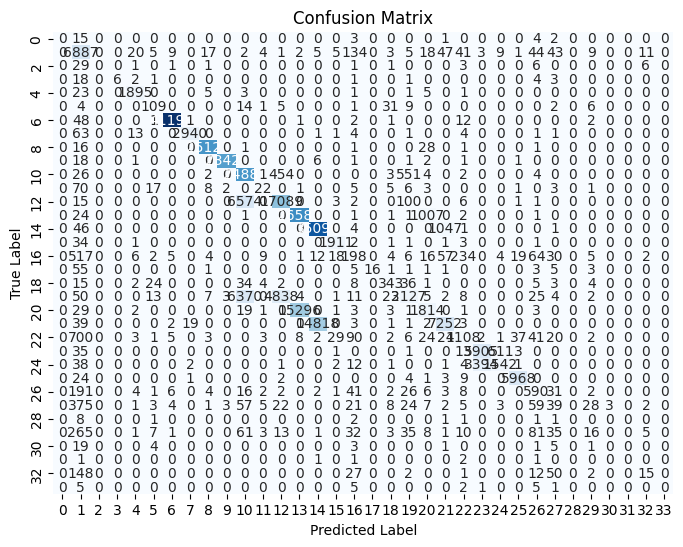

In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, pred)

# Visualize confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

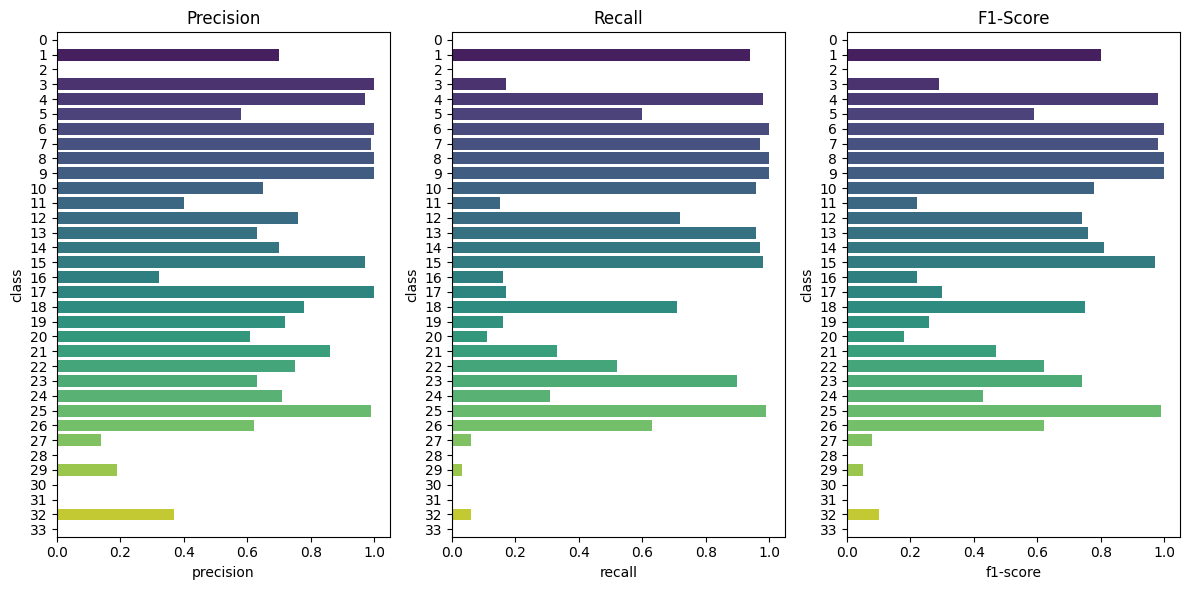

In [ ]:
# Visualize classification report
# Extract values from the report for plotting
report_data = []
for row in f.split('\n')[2:-5]:
    row_data = row.split()
    report_data.append({
        'class': row_data[0],
        'precision': float(row_data[1]),
        'recall': float(row_data[2]),
        'f1-score': float(row_data[3])
    })

# Create a DataFrame from the extracted data
df_report = pd.DataFrame(report_data)

# Visualize precision, recall, and f1-score using bar plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(x='precision', y='class', data=df_report, palette='viridis')
plt.title('Precision')
plt.subplot(1, 3, 2)
sns.barplot(x='recall', y='class', data=df_report, palette='viridis')
plt.title('Recall')

plt.subplot(1, 3, 3)
sns.barplot(x='f1-score', y='class', data=df_report, palette='viridis')
plt.title('F1-Score')

plt.tight_layout()
plt.show()

In [ ]:
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn import model_selection


In [ ]:
a = RandomForestClassifier(n_estimators=100)
b = DecisionTreeClassifier()
c =  XGBClassifier()
d = AdaBoostClassifier(n_estimators=100)
e = KNeighborsClassifier(n_neighbors=12)


In [ ]:
f = LogisticRegression()

In [ ]:
from sklearn.ensemble import StackingClassifier

stackingclf = StackingClassifier(
    estimators=[('a', a), ('b', b), ('c', c), ('d', d), ('e', e)],
    final_estimator=f
)

In [ ]:
print('cross validation and stacking : ')
for iterclf,iterlabel in zip([a,b,c,d,e,stackingclf],
                             ['RandomForestClassifier: ',
                              'DecisionTreeClassifier: ',
                              'XGBClassifier: ',
                              'AdaBoostClassifier: ',
                              'KNeighborsClassifier: ']):
  scores = model_selection.cross_val_score(iterclf,X_train,y_train,cv=3,scoring='accuracy')

  print("Accuracy: %0.3f (+/- %0.3f)[%s]"
  %(scores.mean(),scores.std(),iterlabel))

cross validation and stacking : 
Accuracy: 0.992 (+/- 0.000)[RandomForestClassifier: ]
Accuracy: 0.992 (+/- 0.000)[DecisionTreeClassifier: ]
Accuracy: 0.992 (+/- 0.000)[XGBClassifier: ]
Accuracy: 0.651 (+/- 0.099)[AdaBoostClassifier: ]
Accuracy: 0.938 (+/- 0.000)[KNeighborsClassifier: ]
